## Low Hanging Fruit- Descriptive Statistics

### Across the Database and Partitioned By Genre and Decade

This notebook compiles some basic descriptive statistics to use as a backdrop for the sentiment analysis: 
- word counts as a proxy for song length
- word repetition as the inverse of lexical diversity

It starts with the standard library loads.

In [33]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


Load additional:

In [34]:
import itertools
import collections
import json
import pickle
import nltk

#this only necessary first time through, hence commented out
#nltk.download()

Stored Data:

In [35]:
# Open everything that's been saved in /data/conditioned
df=pd.read_csv("../../data/conditioned/use-this-master-lyricsdf-extracted.csv")
dfg=pd.read_csv("../../data/conditioned/master-lyricsdf-genre_inner.csv")

with open("../../data/conditioned/noun-n-gram.json") as json_file:
    noungram = json.load(json_file)
with open("../../data/conditioned/nounvocab.json") as json_file:
    nounvocab = json.load(json_file)
with open("../../data/conditioned/nounid2word.json") as json_file:
    nounid2word = json.load(json_file)
with open("../../data/conditioned/adj-n-gram.json") as json_file:
    adjgram = json.load(json_file)
with open("../../data/conditioned/adjvocab.json") as json_file:
    adjvocab = json.load(json_file)
with open("../../data/conditioned/adjid2word.json") as json_file:
    adjvocab = json.load(json_file)
with open("../../data/conditioned/decade-dict.json") as json_file:
    decade_dict = json.load(json_file)
    

f = open("../../data/conditioned/ahypes.p",'r')  
ahypes = pickle.load(f)  
f = open("../../data/conditioned/nhypes.p",'r')  
nhypes = pickle.load(f)
f = open("../../data/conditioned/corpus.p",'r')  
corpus = pickle.load(f)

# open the genre dictionary
with open("../../notebooks/ss/songsbygenre.json") as json_file:
    genre_dict = json.load(json_file)


#df.head(3)

,index,position,year,title.href,title,artist,lyrics,decade,song_key,lyrics_url,lyrics_abstract
0,0,1,1970,https://en.wikipedia.org/wiki/Bridge_over_Trou...,Bridge over Troubled Water,Simon and Garfunkel,When you're weary. Feeling small. When tears a...,1970,1970-1,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...
1,1,2,1970,https://en.wikipedia.org/wiki/(They_Long_to_Be...,(They Long to Be) Close to You,The Carpenters,Why do birds suddenly appear. Everytime you ar...,1970,1970-2,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...
2,2,3,1970,https://en.wikipedia.org/wiki/American_Woman_(...,American Woman,The Guess Who,"Mmm, da da da. Mmm, mmm, da da da. Mmm, mmm, d...",1970,1970-3,http://lyrics.wikia.com/The_Guess_Who:American...,"Mmm, da da da. Mmm, mmm, da da da. Mmm, mmm, d..."


## Lexical Diversity Exploration

Lexical diversity is the ratio of unique words (i.e. vocabulary) to total words in a given body of work.

Stored in JSON objects suitable for visualizations

### Measure the df and the deades and the genres 


In [46]:
## Lexical Diversity Exploration
decades=df.decade.unique()
df.shape, len(decades), len(genre_dict)

((4500, 11), 5, 435)

## Repetition of Words Within Songs

Repetition of words or phrases is a frequently used design element in music lyrics. Comparison of text analysis of lyrics to text analysis of prose could therefore be uninformative or even misleading. While this subject alone could merit extensive study, at the point we make some effort to quantify the degree of repetition contained in each song by calculating its lexical diversity using NLTK, as described in Bird,Klein, and Loper [Natural Language Processing with Python](http://www.nltk.org/book/). A column for lexical diversity is added to each row of the dataframe.  

In [36]:
#df[df.title=='Tubular Bells']['lyrics']="Instrumental"
df.iloc[478,6]="Instrumental"
df.iloc[478,6]

'Instrumental'

In [37]:
## should not be needed since bad data has been removed from the df.................

# change "We don't currently have a license" to "instrumental" so it's deleted when 
# all containing "instrumental" are
counter=0
#eliminate rows with null lyrics
dfc = df[pd.isnull(df.lyrics)==False]


for row in dfc.iterrows():
    if row[1][6].startswith("We don't currently have a license"):
        dfc.iloc[row[1][1],6]="Instrumental"
    counter+=1
    if counter >3000:
        break


#eliminate instrumentals
dfc = dfc[df.lyrics!="Instrumental"]


dfc.shape
dfc.head(2)

,index,position,year,title.href,title,artist,lyrics,decade,song_key,lyrics_url,lyrics_abstract
0,0,1,1970,https://en.wikipedia.org/wiki/Bridge_over_Trou...,Bridge over Troubled Water,Simon and Garfunkel,When you're weary. Feeling small. When tears a...,1970,1970-1,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...
1,1,2,1970,https://en.wikipedia.org/wiki/(They_Long_to_Be...,(They Long to Be) Close to You,The Carpenters,Why do birds suddenly appear. Everytime you ar...,1970,1970-2,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...


In [38]:
# make an array containing lexical diversity of each song
wordset=[]
wordcount=[]
lexdivs=[]
repscore=[]
counter=0
for row in dfc.iterrows():
    k=row[1][6]
    d=len(nltk.word_tokenize(k))
    n=len(set(nltk.word_tokenize(k)))
    wordset.append(1.0*n)
    wordcount.append(1.0*d)    

In [39]:
dfc['wordcount']=wordcount
dfc['wordset']=wordset
lexdivs= np.array(wordset)/np.array(wordcount)
dfc['lexdiv']=lexdivs
dfc['repetition_score']= 1/lexdivs
print len(lexdivs), len(dfc)
dfc.head(2)

4340 4340


,index,position,year,title.href,title,artist,lyrics,decade,song_key,lyrics_url,lyrics_abstract,wordcount,wordset,lexdiv,repetition_score
0,0,1,1970,https://en.wikipedia.org/wiki/Bridge_over_Trou...,Bridge over Troubled Water,Simon and Garfunkel,When you're weary. Feeling small. When tears a...,1970,1970-1,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...,201,82,0.407960,2.451220
1,1,2,1970,https://en.wikipedia.org/wiki/(They_Long_to_Be...,(They Long to Be) Close to You,The Carpenters,Why do birds suddenly appear. Everytime you ar...,1970,1970-2,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...,252,65,0.257937,3.876923


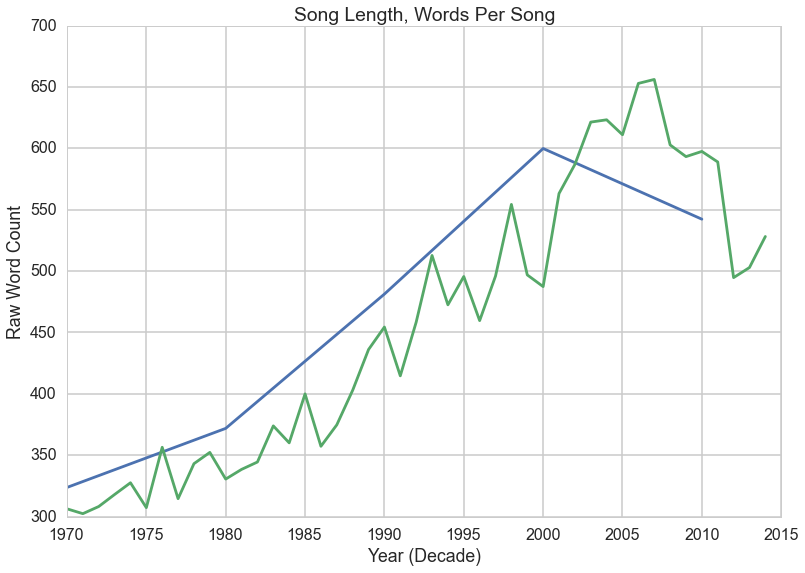

In [40]:
def lexplot(stat,title,ylab):
    years=dfc.groupby('decade')
    yearlexdiv= dict()
    for year in years:
        yearlexdiv[year[0]]= year[1][stat].mean()
    plotdict = collections.OrderedDict(sorted(yearlexdiv.items())) 
    #plt.ylim([0,1])
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel("Year (Decade)")
    x=plotdict.keys()
    y=plotdict.values()
    plt.plot(x,y)

    years=dfc.groupby('year')
    yearlexdiv= dict()
    for year in years:
        yearlexdiv[year[0]]= year[1][stat].mean()
    plotdict = collections.OrderedDict(sorted(yearlexdiv.items())) 
    x=plotdict.keys()
    y=plotdict.values()
    plt.plot(x,y)
lexplot('wordcount',"Song Length, Words Per Song","Raw Word Count")

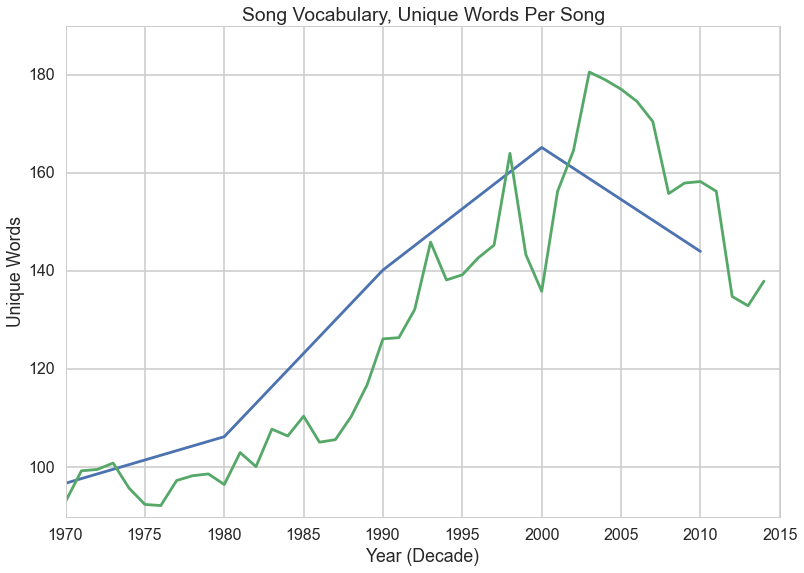

In [41]:
lexplot("wordset","Song Vocabulary, Unique Words Per Song","Unique Words")

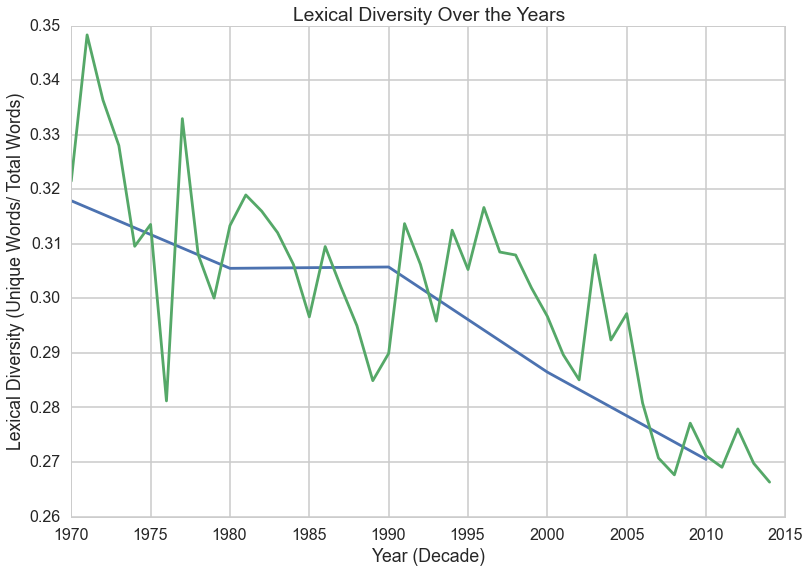

In [42]:
lexplot('lexdiv',"Lexical Diversity Over the Years","Lexical Diversity (Unique Words/ Total Words)")

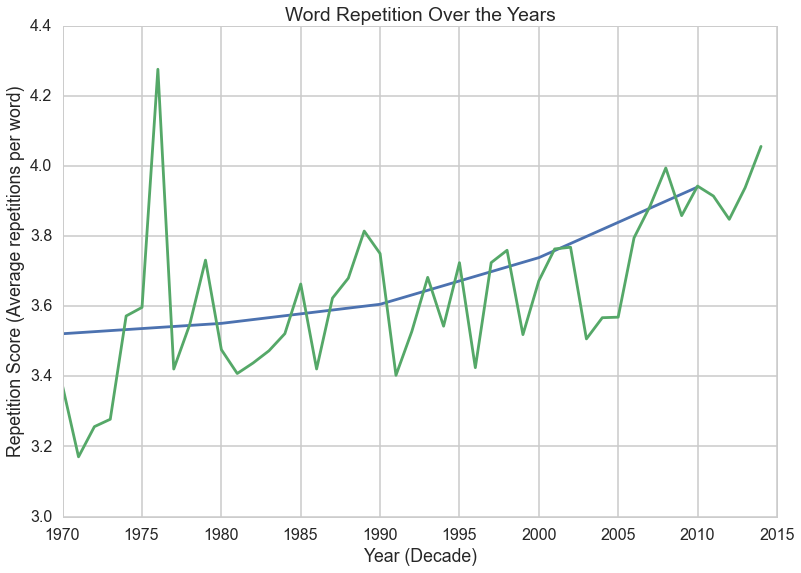

In [43]:
lexplot('repetition_score',"Word Repetition Over the Years","Repetition Score (Average repetitions per word)")

With both word count and words per song increasing over time, it appears that many of the additional words are ones that are reused. Looking at the top ten for repetition:

In [44]:
dfc.sort(columns='repetition_score', inplace=True,ascending=False)
dfc.head(10)

,index,position,year,title.href,title,artist,lyrics,decade,song_key,lyrics_url,lyrics_abstract,wordcount,wordset,lexdiv,repetition_score
2834,2834,35,1998,https://en.wikipedia.org/wiki/Tubthumping,Tubthumping,Chumbawamba,We'll be singing. When we're winning. We'll be...,1990,1998-35,http://lyrics.wikia.com/Chumbawamba:Tubthumping,We'll be singing. When we're winning. We'll be...,1443,56,0.038808,25.767857
2769,2769,70,1997,https://en.wikipedia.org/wiki/Tubthumping,Tubthumping,Chumbawamba,We'll be singing. When we're winning. We'll be...,1990,1997-70,http://lyrics.wikia.com/Chumbawamba:Tubthumping,We'll be singing. When we're winning. We'll be...,1443,56,0.038808,25.767857
692,692,93,1976,https://en.wikipedia.org/wiki/Give_Up_the_Funk...,Give Up the Funk (Tear the Roof off the Sucker),Parliament,". You've got a real type of thing going down, ...",1970,1976-93,http://lyrics.wikia.com/Parliament:Give_Up_The...,". You've got a real type of thing going down, ...",949,58,0.061117,16.362069
2575,2575,76,1995,https://en.wikipedia.org/wiki/Short_Dick_Man,Short Dick Man,20 Fingers,"Ah, ah. Ah, ah. Ah, ah, ah, ah. Ah, ah. Ah, ah...",1990,1995-76,http://lyrics.wikia.com/20_Fingers:Short_Dick_Man,"Ah, ah. Ah, ah. Ah, ah, ah, ah. Ah, ah. Ah, ah...",1026,71,0.069201,14.450704
623,623,24,1976,https://en.wikipedia.org/wiki/Get_Up_and_Boogi...,Get Up and Boogie,Silver Convention,"(That's right). Get up and boogie, get up and ...",1970,1976-24,http://lyrics.wikia.com/Silver_Convention:Get_...,"(That's right). Get up and boogie, get up and ...",176,13,0.073864,13.538462
613,613,14,1976,"https://en.wikipedia.org/wiki/Fly,_Robin,_Fly","Fly, Robin, Fly",Silver Convention,"Fly, robin, fly. Fly, robin, fly. Fly, robin, ...",1970,1976-14,http://lyrics.wikia.com/Silver_Convention:Fly%...,"Fly, robin, fly. Fly, robin, fly. Fly, robin, ...",132,10,0.075758,13.200000
520,520,21,1975,https://en.wikipedia.org/wiki/The_Hustle_(song),The Hustle,Van McCoy,. Do it. Do it. Do it. Do the Hustle. Do the H...,1970,1975-21,http://lyrics.wikia.com/Van_McCoy:The_Hustle,. Do it. Do it. Do it. Do the Hustle. Do the H...,60,5,0.083333,12.000000
411,411,12,1974,https://en.wikipedia.org/wiki/Jungle_Boogie,Jungle Boogie,Kool and the Gang,"Get down, get down. Get down, get down. Get do...",1970,1974-12,http://lyrics.wikia.com/Kool_%26_The_Gang:Jung...,"Get down, get down. Get down, get down. Get do...",467,44,0.094218,10.613636
644,644,45,1976,https://en.wikipedia.org/wiki/That%27s_the_Way...,That's the Way (I Like It),KC and the Sunshine Band,Do do do do do do do do do. Do do do do do do ...,1970,1976-45,http://lyrics.wikia.com/KC_And_The_Sunshine_Ba...,Do do do do do do do do do. Do do do do do do ...,506,49,0.096838,10.326531
629,629,30,1976,https://en.wikipedia.org/wiki/Love_Rollercoaster,Love Rollercoaster,Ohio Players,"Rollercoaster, of love (Say what?). Rollercoas...",1970,1976-30,http://lyrics.wikia.com/Ohio_Players:Love_Roll...,"Rollercoaster, of love (Say what?). Rollercoas...",782,77,0.098465,10.155844


The songs having the least repetition:

In [45]:
dfc.sort(columns='repetition_score', inplace=True,ascending=True)
dfc.head(10)

,index,position,year,title.href,title,artist,lyrics,decade,song_key,lyrics_url,lyrics_abstract,wordcount,wordset,lexdiv,repetition_score
685,685,86,1976,https://en.wikipedia.org/wiki/Who%27d_She_Coo%3F,Who'd She Coo?,Ohio Players,Are you ready\nDo what you wanna do\nDo what y...,1970,1976-86,http://lyrics.wikia.com/Ohio_Players:Who%27d_S...,Are you ready\nDo what you wanna do\nDo what y...,35,26,0.742857,1.346154
1458,1458,59,1984,https://en.wikipedia.org/wiki/Almost_Paradise,Almost Paradise,Mike Reno,I thought that dreams belonged to other men 'C...,1980,1984-59,http://lyrics.wikia.com/index.php?title=Mike_R...,I thought that dreams belonged to other men 'C...,144,104,0.722222,1.384615
1060,1060,61,1980,https://en.wikipedia.org/wiki/Daydream_Believer,Daydream Believer,Anne Murray,Oh I could hide 'neath the wings of the blue b...,1980,1980-61,http://lyrics.wikia.com/Anne_Murray:Daydream_B...,Oh I could hide 'neath the wings of the blue b...,114,79,0.692982,1.443038
179,179,80,1971,https://en.wikipedia.org/wiki/Amazing_Grace,Amazing Grace,Judy Collins,Amazing grace! How sweet the sound. That saved...,1970,1971-80,http://lyrics.wikia.com/Judy_Collins:Amazing_G...,Amazing grace! How sweet the sound. That saved...,128,86,0.671875,1.488372
703,703,4,1977,https://en.wikipedia.org/wiki/Evergreen_(Love_...,Evergreen (Love Theme from A Star Is Born),Barbra Streisand,"Love, soft as an easy chair. Love, fresh as th...",1970,1977-4,http://lyrics.wikia.com/Barbra_Streisand:Everg...,"Love, soft as an easy chair. Love, fresh as th...",128,82,0.640625,1.560976
1386,1386,87,1983,https://en.wikipedia.org/wiki/Lawyers_in_Love_...,Lawyers in Love,Jackson Browne,I can't keep up with what's been going down. I...,1980,1983-87,http://lyrics.wikia.com/Jackson_Browne:Lawyers...,I can't keep up with what's been going down. I...,168,107,0.636905,1.570093
820,820,21,1978,https://en.wikipedia.org/wiki/Feels_So_Good_(c...,Feels So Good,Chuck Mangione,There's no place for me to hide. The thoughts ...,1970,1978-21,http://lyrics.wikia.com/Chuck_Mangione:Feels_S...,There's no place for me to hide. The thoughts ...,118,74,0.627119,1.594595
135,135,36,1971,https://en.wikipedia.org/wiki/Help_Me_Make_It_...,Help Me Make It Through the Night,Sammi Smith,Take the ribbon from my hair. Shake it loose a...,1970,1971-36,http://lyrics.wikia.com/Sammi_Smith:Help_Me_Ma...,Take the ribbon from my hair. Shake it loose a...,128,79,0.617188,1.620253
1799,1799,100,1987,https://en.wikipedia.org/wiki/Love_You_Down,Love You Down,Ready for the World,It never really matter too much to me. That yo...,1980,1987-100,http://lyrics.wikia.com/Ready_For_The_World:Lo...,It never really matter too much to me. That yo...,81,49,0.604938,1.653061
1149,1149,50,1981,NaN,Sweetheart,Franke and the Knockouts,I know baby it's hard to be strong. Just take ...,1980,1981-50,http://lyrics.wikia.com/Franke_%26_The_Knockou...,I know baby it's hard to be strong. Just take ...,144,87,0.604167,1.655172


## Lexical Diversity By Genre

There are 435 distinct genres represented in the top 100 for the years 1970-2014, according to the Billboard classification system. Nobody wants to examine 435 panels to spot patterns; accordingly the inquiry will be limited to the genres containing 300 or more members. As a result the number to be considered is only.

In [50]:
# Use the plot-by-decade approach to dataframes limited to specific genre
j=genre_dict
j['/wiki/Alternative_rock']

dfg=df[df.song_key == song]
dfg



NameError: name 'song' is not defined